In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
## detecting faces

import glob

if False:
    for target in targets.keys():
        for filename in glob.glob(os.path.join(datapath, target) + '/*.png'):
            frame = imageio.imread(filename)
            print(filename)

In [ ]:
import os
datapath_faces = 'dataset_faces'
try:
    os.mkdir(datapath_faces)
except:
    pass
for target in targets.keys():
    print(os.path.join(datapath_faces, target))
    try:
        os.mkdir(os.path.join(datapath_faces, target))
    except:
        pass


In [ ]:
import dlib
detector = dlib.get_frontal_face_detector()

for target in targets.keys():
    for filename in glob.glob(os.path.join(datapath, target) + '/*.png'):
        frame = imageio.imread(filename)
        N_X, N_Y, three = frame.shape
        dets = detector(frame, 1)
        if False:
            print("Number of faces detected: {}".format(len(dets)))
            for i, d in enumerate(dets):
                print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
                    i, d.left(), d.top(), d.right(), d.bottom()))
                
        d = dets[0]
        if False:
            # Create figure and axes
            fig, ax = plt.subplots(figsize=(15, 8))

            # Display the image
            ax.imshow(frame)

            # Create a Rectangle patch
            rect = patches.Rectangle((d.bottom(), d.left()), d.right()-d.left(), d.top()-d.bottom(), linewidth=1, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)
            plt.show()    
        if False:
            # Create figure and axes
            fig, ax = plt.subplots(figsize=(15, 8))

            # Display the cropped image
            ax.imshow(frame[(d.top()):(d.bottom()), (d.left()):(d.right()), :])

            plt.show()                
            
        filename_face = filename.replace(datapath, datapath_faces)
        imageio.imwrite(filename_face, frame[(d.top()):(d.bottom()), (d.left()):(d.right()), :]) 


## running the model on the cropped faces

In [2]:
from gaze import init

args = init(verbose=1)
print('Parameters=', args)

path = '_Regard.pt'

Parameters= {'dataset_folder': 'dataset_faces', 'batch_size': 16, 'test_batch_size': 1, 'valid_size': 0.2, 'epochs': 20, 'do_adam': False, 'lr': 0.05, 'momentum': 0.18, 'no_cuda': False, 'num_processes': 1, 'seed': 42, 'log_interval': 0, 'fullsize': 175, 'crop': 175, 'size': 150, 'mean': 0.36, 'std': 0.3, 'conv1_dim': 5, 'conv1_kernel_size': 7, 'conv2_dim': 13, 'conv2_kernel_size': 7, 'stride1': 2, 'stride2': 4, 'N_cv': 10, 'dimension': 25, 'verbose': 1}


In [3]:
!ls -l {path}
#!rm {path}

-rw-r--r--  1 lolo  staff  350345 Sep  5 12:22 _Regard.pt


In [4]:
from gaze import ML
ml = ML(args)

import os
import torch
if os.path.isfile(path):
    ml.model.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    ml.train()
    torch.save(ml.model.state_dict(), path) #save the neural network state
    print('Model saved at', path)

cuda? False
no cuda? True
Found 450 sample images;  360  to train 90 to test
Loading file _Regard.pt


## testing the model

In [5]:
Accuracy = ml.test()

Showing the one which are wrong:

target:right
pred  : left


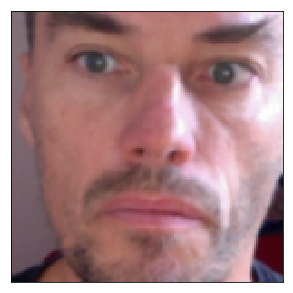

target:center
pred  :blink


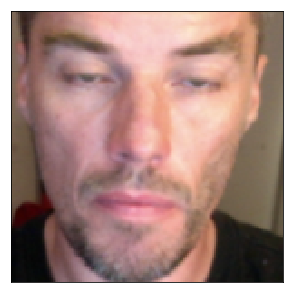

target:center
pred  : left


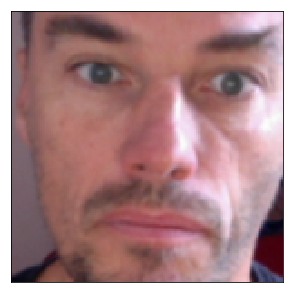

target:center
pred  : left


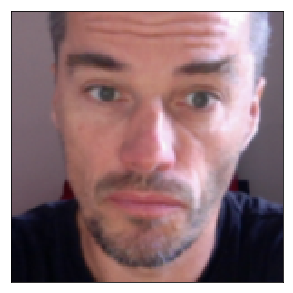

target: left
pred  :center


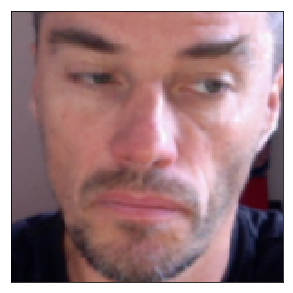

target:right
pred  :center


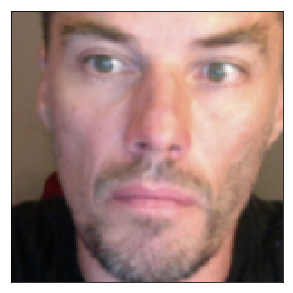

target: left
pred  :center


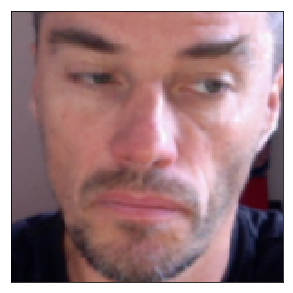

target:center
pred  : left


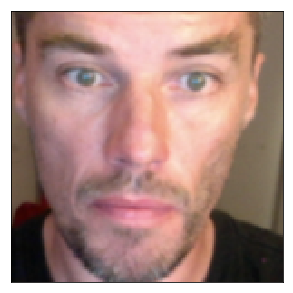

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

for data, labels in ml.dataset.test_loader:
    fig, ax = ml.show(only_wrong=True)
    plt.show() 


## cross-validation

In [ ]:
args = init(verbose=1, log_interval=0)
from gaze import MetaML
mml = MetaML(args)
Accuracy = mml.protocol(args, 42)
print('Accuracy', Accuracy)

Train Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

cuda? False
no cuda? True
Found 450 sample images;  360  to train 90 to test


Train Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

cuda? False
no cuda? True
Found 450 sample images;  360  to train 90 to test


Train Epoch:  30%|███       | 6/20 [01:04<02:31, 10.80s/it]

In [ ]:
plt.hist(Accuracy, bins=7) 
plt.show() 